# UNIX Commands for Data Scientists

## Declare Filename

In [1]:
!ls ./unix

shakespeare.txt


In [2]:
filename = './unix/shakespeare.txt'
!echo $filename

./unix/shakespeare.txt


## head

In [3]:
!head -n 3 $filename

## tail

In [4]:
!tail -n 10 $filename

## wc

In [5]:
!wc $filename

 124505  901447 5583442 ./unix/shakespeare.txt


In [6]:
!wc -l $filename

124505 ./unix/shakespeare.txt


## cat

In [7]:
!cat $filename | wc -l 

124505


## grep

In [8]:
!grep -i 'parchment' $filename

In [9]:
#output matching pattern one per line and then count number of lines

!cat $filename | grep -o 'liberty' | wc -l

71


## sed

In [10]:
#replace all instances of 'parchment' to 'manuscript'

!sed -e 's/parchment/manuscript/g' $filename > temp.txt

In [11]:
!grep -i 'manuscript' temp.txt 

## sort

In [12]:
#SORT
!head -n 5 $filename

In [13]:
!head -n 5 $filename | sort

In [14]:
# columns separated by ' ', sort on column 2 (-k2), case insensitive (-f)
!head -n 5 $filename | sort -f -t' ' -k2

In [15]:
!sort $filename | wc -l

124505


In [16]:
# uniq command for getting unique records using -u option

!sort $filename | uniq -u | wc -l

110834


# Lets bring it all together

## Count most frequent words in the text un UNIX

In [17]:
!sed -e 's/ /\n/g' -e 's/\r//g'  < $filename | sort | uniq -c | sort -nr | head -15

 517068 
  23244 the
  19542 I
  18302 and
  15623 to
  15551 of
  12532 a
  10824 my
   9576 in
   9081 you
   7851 is
   7531 that
   7068 And
   6948 not
   6722 with
sort: write failed: 'standard output': Broken pipe
sort: write error


In [18]:
# head stops after 15 lines, hence 'sort' command is sending the last two lines

## Write the output to a file

In [19]:
!sed -e 's/ /\n/g' -e 's/\r//g' < $filename | sort | sed '/^$/d' | uniq -c | sort -nr | head -15 > count_vs_words

sort: write failed: 'standard output': Broken pipe
sort: write error


In [20]:
!cat count_vs_words

  23244 the
  19542 I
  18302 and
  15623 to
  15551 of
  12532 a
  10824 my
   9576 in
   9081 you
   7851 is
   7531 that
   7068 And
   6948 not
   6722 with
   6218 his


## Plot by importing wordcounts into Python

In [21]:
%matplotlib inline

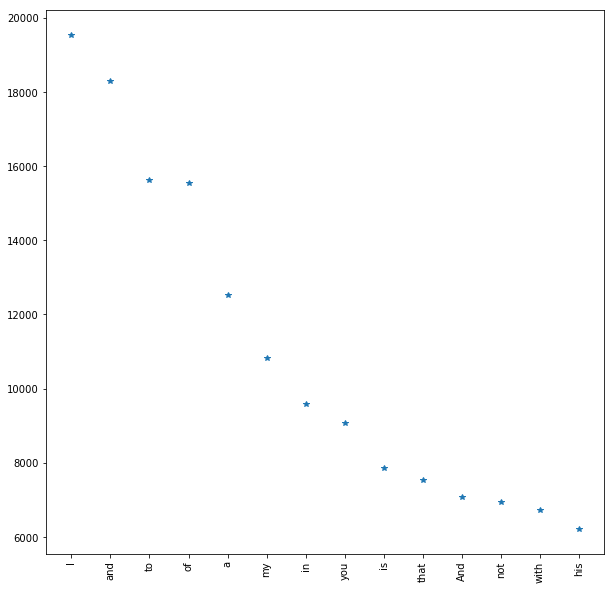

In [22]:
import matplotlib.pyplot as plt
import csv

xTicks = []
y = []

with open('count_vs_words','r') as csvfile:
    plots = csv.reader(csvfile, delimiter=' ')
    for row in plots:
        y.append(int(row[-2]))
        xTicks.append(str(row[-1]))

#remove the count of spaces (first line)
y = y[1:]
xTicks = xTicks[1:]
#plot
x = range(len(y))
plt.figure(figsize=(10,10))
plt.xticks(x, xTicks, rotation=90) #xlabel  with 90 degree angle
plt.plot(x,y,'*')
plt.show()